<a href="https://colab.research.google.com/github/sglhsr/Machine_Learing/blob/main/20220316(%E4%BD%BF%E7%94%A8%E7%8F%BE%E6%88%90%E7%9A%84model_RseNet50)_0719colab02b_Cooper_%E7%9C%9F%E7%9A%84%E6%98%AF%E9%A6%AC%E7%88%BE%E6%BF%9F%E6%96%AF%E5%97%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 讀入使用套件

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#ResNet50 別人訓練好的model
from tensorflow.keras.applications import ResNet50
#preprocess_input: CNN model通常訓練前會將每張圖片預處理,先讀入resnet的預處理
#強化對比等特徵,讓神經網路更好判斷
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.preprocessing.image import load_img, img_to_array
#自動讀檔,把網路連結當成自己的硬碟檔案
from urllib.request import urlretrieve

### 2. 檔案設定

In [ ]:
urlretrieve("https://raw.githubusercontent.com/yenlung/Deep-Learning-Basics/master/data/imagnet-classes.txt", "imagnet-classes.txt")
#直接讀文字檔要放在raw.githubusercontent.com後面並移除blob 
cooper=[] #cooper照片有6張,一一讀進來cooper1,cooper2....cooper6
for i in range(1,6):
    # https://github.com/sglhsr/Machine_Learing/blob/main/data/cooper/cooper01.jpg
#   https://github.com/sglhsr/Machine_Learing/raw/main/data/cooper/cooper01.jpg  github要直接抓圖片把/blob/改成/raw/
  urlretrieve(f"https://github.com/sglhsr/Machine_Learing/raw/main/data/cooper/cooper0{i}.jpg",f"cooper0{i}.jpg")
  # urlretrieve(f"https://github.com/yenlung/Deep-Learning-Basics/raw/master/data/cooper/cooper0{i}.jpg", f"cooper0{i}.jpg")
  cooper.append(f"cooper0{i}.jpg")

In [ ]:
cooper

['cooper01.jpg',
 'cooper02.jpg',
 'cooper03.jpg',
 'cooper04.jpg',
 'cooper05.jpg',
 'cooper06.jpg']

### 3. 讀入一隻 Cooper 試試

In [ ]:
img = load_img(cooper[2], target_size = (224,224))

In [ ]:
#img  #直接打img也能show圖片

In [ ]:
x = img_to_array(img)
x.shape  #224,224,3(RGB三層)


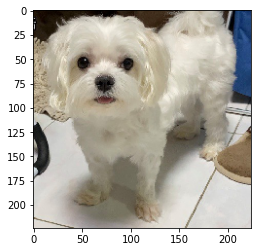

In [ ]:
plt.axis('off') #axis就是設定座標軸相關, 關掉座標軸
plt.imshow(x/255);#分號;是移除最上面那行matplotlib的標示
#會取值的範圍只有0~1


### 4. 讀入 ResNet50 及 labels

In [ ]:
resnet = ResNet50() #讀入model

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
with open('imagnet-classes.txt') as f:
  labels = [line.strip() for line in f.readlines()] #strip() 去除首尾空格

In [ ]:
#(224,224,3)=>(1(1張照片),224,224,3(rgb3個channel))
x = x.reshape(1, 224, 224, 3)

In [ ]:
inp = preprocess_input(x)     #預處理該圖片

In [ ]:
#1000個整類當中選出一個數字 找出是第幾號 種類的數字
#用現有的ResNet來預測圖片是不是馬爾濟斯
[k] = np.argmax(resnet.predict(inp), axis=-1)

In [ ]:
print(f"ResNet 覺得是 {labels[k]}")

ResNet 覺得是 Maltese dog 馬爾濟斯犬


### 5. 做成 Web App!

In [ ]:
!pip install gradio

In [ ]:
#gradio 互動式就是搞好input output就好
import gradio as gr

In [ ]:
def classify_image(inp):
  inp = inp.reshape((-1, 224, 224, 3)) # (-1 讓它自己抓大小(幾張照片), 3層RGB
  inp = preprocess_input(inp)  #resnet圖片都要預處理
  prediction = resnet.predict(inp).flatten() #輸出完記得要扁平化
  return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.inputs.Image(shape=(224, 224))
label = gr.outputs.Label(num_top_classes=3)  #output='Label',  num_top_classs 前3筆主要類別
sample_images = [[f'cooper0{i}.jpg'] for i in range(1,7)]   #範例圖

gr.Interface(fn=classify_image, inputs=image, outputs=label, )
             examples=sample_images,
             capture_session=True).launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://51987.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://51987.gradio.app')